# Tareas de programación: Programming Assignment 4: Divide and Conquer

## 4-1. Binary Search

Introducción En este problema, implementará el algoritmo de búsqueda binaria que permite buscar listas (incluso enormes) de manera muy eficiente, siempre que la lista esté ordenada.
Descripción del problema Tarea. El objetivo de este problema de código es implementar el algoritmo de búsqueda binaria.
Formato de entrada. La primera línea de la entrada contiene un número entero y una secuencia $0< ?_{1}< . . . < ?_{?−1}$ de ? enteros positivos distintos por pares en orden creciente. La siguiente línea contiene un número entero y números enteros positivos $?_{0}, ?_{1}, . . . , ?_{?−1}$.

Restricciones.$1≤?, ?≤10^4; 1≤?_{?} ≤10^9$para todos $0≤? < ?;1≤??≤10^9$ para todos$0≤? < ?$

Formato de salida. Para todos $ ?$ de $0$ a $?−1$, genera un índice $0≤?≤?−1$ tal que $?_?=?_?$ o $−1$ si no existe tal índice

In [1]:
# python3
seq = [int(i) for i in input().split()]
search_seq = [int(i) for i in input().split()]
n = seq[0]
seq = seq[1:]

def binary_search(seq, elt, r):
    l = 0
    while l<=r: 
        m = (l+r)//2
        if elt > seq[m]:
            l = m + 1
        elif elt < seq[m]:
            r = m - 1
        else:
            return m
    return -1

soln = list()
for i in search_seq[1:]:
    ans = binary_search(seq, i, n-1)
    soln.append(ans)
print(' '.join([str(i) for i in soln]))

5 1 5 8 12 15
5 1 2 3 23 32
0 -1 -1 -1 -1


## 4-3. Majority Element

Escriba una función que tome una matriz e imprima el elemento mayoritario (si existe), de lo contrario, imprima "Sin elemento mayoritario". Un elemento mayoritario en una matriz A[ ] de tamaño $n$ es un elemento que aparece más de $\frac{n}{2}$ veces (y, por lo tanto, hay como máximo uno de esos elementos).

In [3]:
# python3
n = int(input())
seq = [int(i) for i in input().split()]


def divide_func(seq, l, r):
    if l+1==r:
        return seq[l]
    elif l+2==r:
        return seq[l]
    m = (l+r)//2
    left = divide_func(seq, l, m)
    right = divide_func(seq, m, r)

    c1, c2 = 0, 0
    for i in seq[l:r]:
        if i == left:
            c1+=1
        elif i == right:
            c2+=1
    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

print(int(divide_func(seq, 0, n) != -1))

4
2 3 4 1
0


## 4-4. Improving Quick Sort

Al igual que Merge Sort, QuickSort es un algoritmo Divide and Conquer. Selecciona un elemento como pivote y divide la matriz dada alrededor del pivote elegido. Hay muchas versiones diferentes de quickSort que seleccionan el pivote de diferentes maneras.

Elija siempre el primer elemento como pivote.
Elija siempre el último elemento como pivote (implementado a continuación)
Elija un elemento aleatorio como pivote.
Elija la mediana como pivote.
El proceso clave en QuickSort es la partición(). El objetivo de las particiones es, dada una matriz y un elemento x de la matriz como pivote, colocar x en su posición correcta en la matriz ordenada y colocar todos los elementos más pequeños (menores que x) antes de x, y colocar todos los elementos mayores (mayores que x) después X. Todo esto debe hacerse en tiempo lineal.

In [4]:
import random
import time
def quicksort3(arr, l, r):
    # print('Splitting:', arr[l:r])
    if l + 1 >= r:
        return

    # Pivot selection; Return a random integer N such that l <= N <= r
    m = random.randint(l, r-1)
    # temp = sorted([(0,arr[0]), ((l+r)//2,arr[(l+r)//2]), (-1,arr[-1])], key = lambda x: x[1])
    # m = temp[1][0]
    arr[l], arr[m] = arr[m], arr[l]

    # partition procedure
    m1, m2 = partition3(arr, l, r)

    quicksort3(arr, l, m1)
    quicksort3(arr, m2+1, r)

def partition3(arr, l, r):
    m2 = l
    for i in range(l+1, r):
        if arr[i] <= arr[l]:
            arr[m2+1], arr[i] = arr[i], arr[m2+1]
            m2 += 1

    arr[l], arr[m2] = arr[m2], arr[l]

    m1 = l
    for i in range(l, m2):
        if arr[i] < arr[m2]:
            arr[i], arr[m1] = arr[m1], arr[i]
            m1 += 1
    return m1, m2

def create_array(size):
    return [random.choice(list(range(10))) for _ in range(size)]

# n = int(input())
# seq = [int(i) for i in input().split()]
# for x in seq:
    # print(x, end=' ')

t1 = time.time()
seq = create_array(100000)
quicksort3(seq, 0, 100000)
t2 = time.time()
print('Time taken:', t2-t1)

Time taken: 0.25333094596862793


## 4-5. Inversions

In [5]:
# python3

""" Task: Count the number of inversions of a given sequence """

def merge(left, right):
    i, j, inversion_counter = 0, 0, 0
    final = list()
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inversion_counter += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
        
    return final, inversion_counter

def mergesort(arr):
    global tot_count
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2

    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])

    sorted_arr, temp = merge(left, right)
    tot_count += temp

    return sorted_arr

tot_count = 0
n = int(input())
seq = [int(i) for i in input().split()]
mergesort(seq)
print(tot_count)

5
2 3 9 2 9
2


## 4-6. Organizing a Lottery

Descripción del problema
Tarea. Te dan un conjunto de puntos en una línea y un conjunto de segmentos en una línea. El objetivo es calcular, para cada punto, el número de segmentos que contienen este punto.

Formato de entrada. La primera línea contiene dos números enteros no negativos s y p que definen el número de segmentos y el número de puntos en una línea, respectivamente. Las siguientes líneas s contienen dos números enteros ai, bi que definen el i-ésimo segmento [ai, bi]. La siguiente línea contiene p enteros que definen los puntos x1, x2, . . . , xp.

Formato de salida. Salida p enteros no negativos k0, k1, . . . , k(p-1) donde ki es el número de segmentos que contienen xi.

In [6]:
# Inputs
master_list = list()
s, p = [int(i) for i in input().split()]

for i in range(s):
    a, b = [int(i) for i in input().split()]
    master_list.append((a,'l'))
    master_list.append((b,'r'))

points = input().split()
for i in points:
    master_list.append((int(i),'p'))

master_list.sort()

segment_count = 0
point_segment_map = dict()
for i in master_list:
    if i[1] == 'l': segment_count += 1
    elif i[1] == 'r': segment_count -= 1
    else:
        point_segment_map[i[0]] = segment_count

temp = ''
for i in points:
    temp += str(point_segment_map[int(i)]) + ' '
print(temp[:-1])

2 3
0 5
7 10
1 6 11
1 0 0


## 4-7. Closest Points

In [7]:
import math
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def closest_split_pair(p_x, p_y, delta, best_pair):
    ln_x = len(p_x)  # store length - quicker
    mx_x = p_x[ln_x // 2][0]  # select midpoint on x-sorted array

    # Create a subarray of points not further than delta from midpoint on x-sorted array
    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]

    best = delta  # assign delta value to best
    ln_y = len(s_y)  # store length of subarray for quickness
    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)):    # We have to check only next 5 points; proof found in literature
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst
    return best_pair[0], best_pair[1], best


def brute(ax):
    mi = dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    ln_ax = len(ax)
    if ln_ax == 2:
        return p1, p2, mi
    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi:  # Update min_dist and points
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi


def closest_pair(ax, ay):
    ln_ax = len(ax)  # It's quicker to assign variable
    if ln_ax <= 3:
        return brute(ax)  # A call to bruteforce comparison
    mid = ln_ax // 2  # Division without remainder, need int
    Qx = ax[:mid]  # Two-part split
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()
    for x in ay:  # split ay into 2 arrays using midpoint
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
    # Call recursively both arrays after split
    (p1, q1, mi1) = closest_pair(Qx, Qy)
    (p2, q2, mi2) = closest_pair(Rx, Ry)

    # Determine smaller distance between points of 2 arrays
    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)

    # Call function to account for points on the boundary
    (p3, q3, mi3) = closest_split_pair(ax, ay, d, mn)
    # Determine smallest distance for the array
    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3


def solution(a):
    ax = sorted(a, key=lambda x: x[0])  # Presorting x-wise O(nlogn)
    ay = sorted(a, key=lambda x: (x[1], x[0]))  # Presorting y-wise then x-wise O(nlogn)
    p1, p2, mi = closest_pair(ax, ay)  # Recursive D&C function
    return mi


# Input
points = list()
n = int(input())
for i in range(n):
    points.append([int(i) for i in input().split()])

print(solution(points))

5
0 0 0 0 0
2 3 1 2 3
3 2 1 5 4
2 3 1 3 1
2 3 7 8 9
0.0


## Coursera

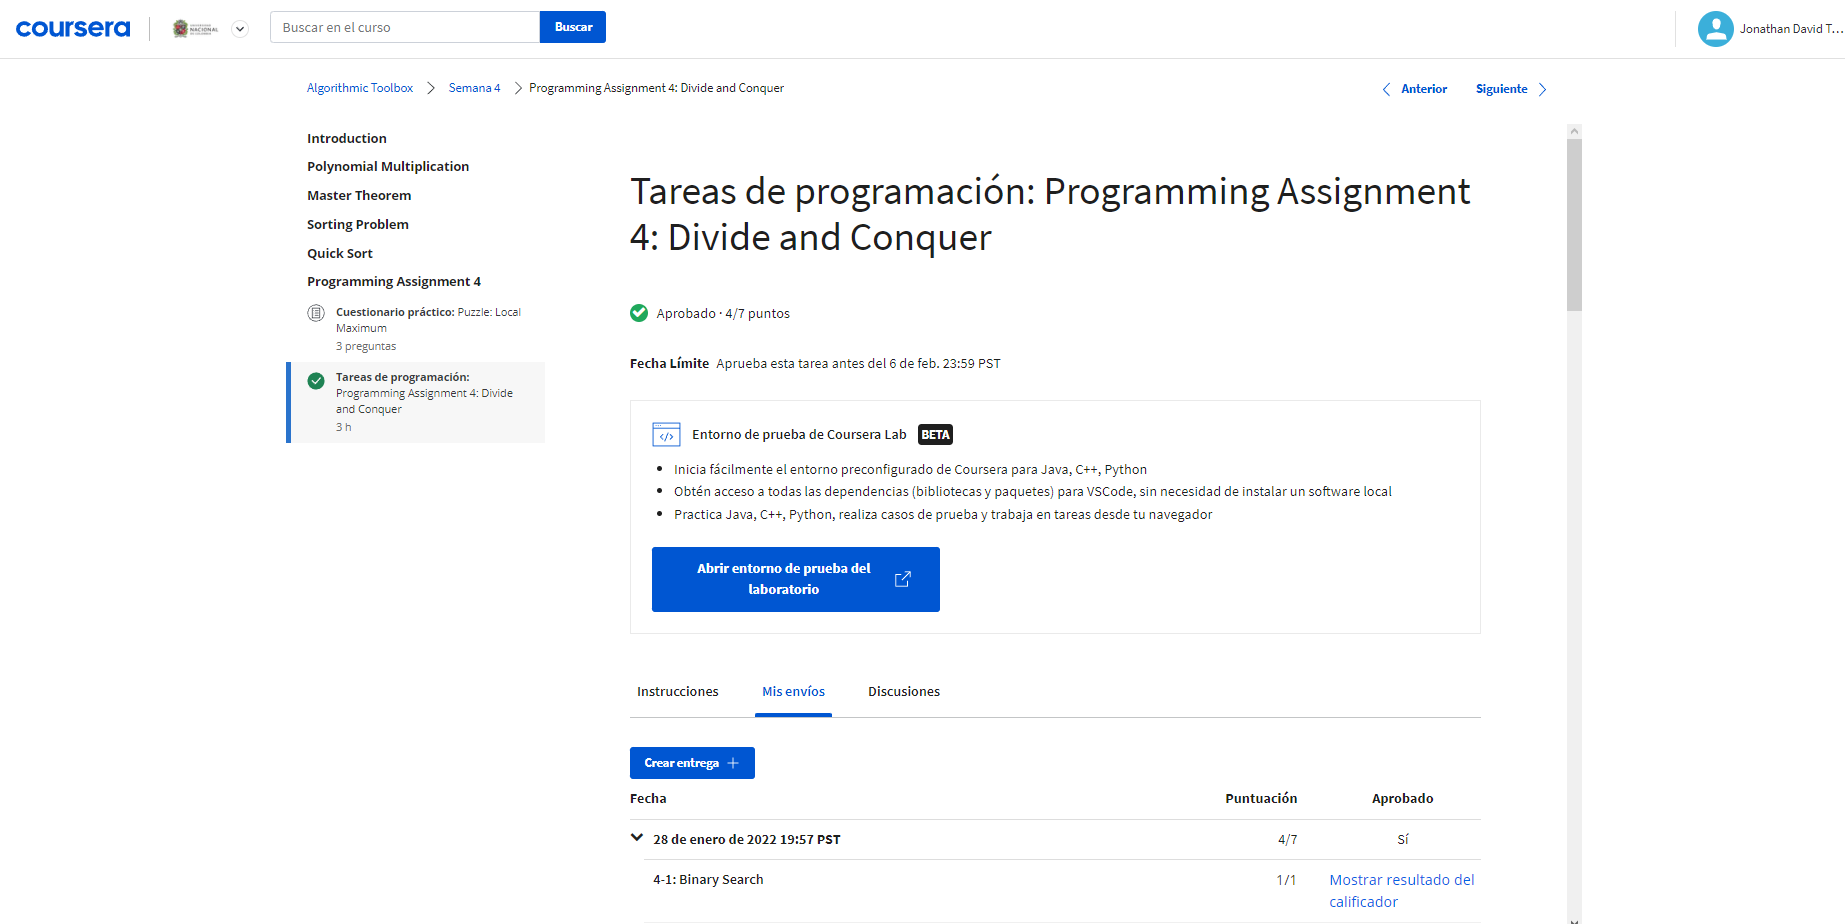

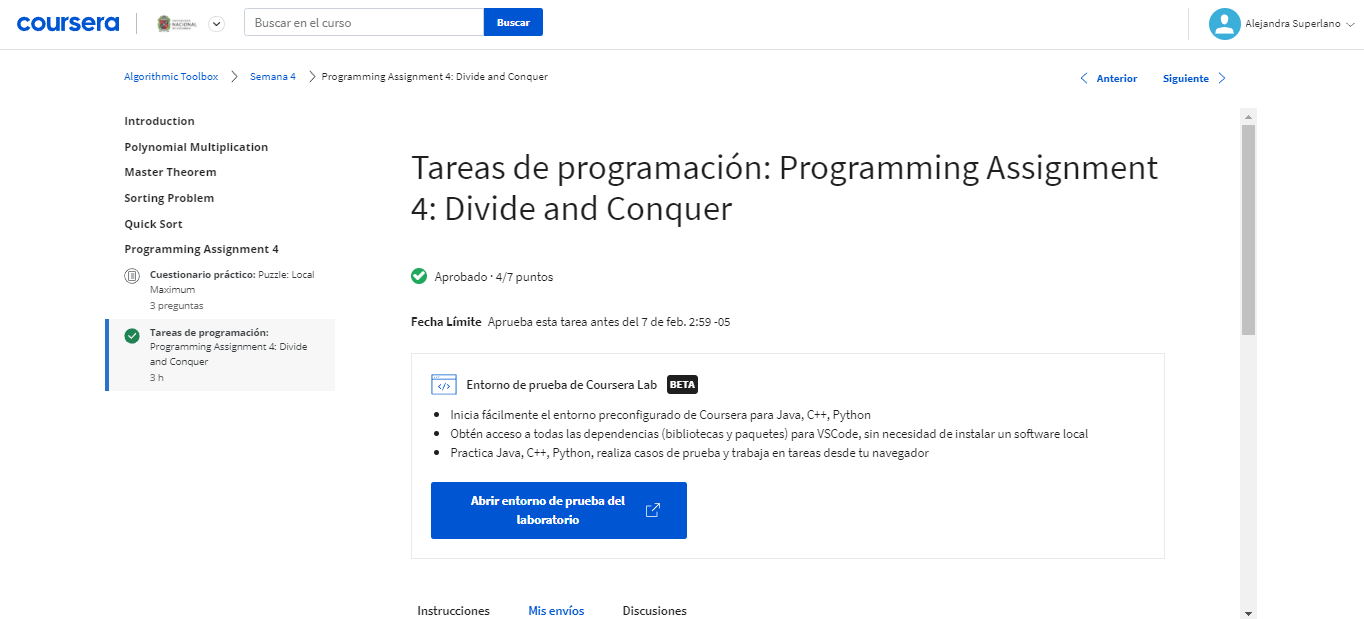